In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def function(x, y):
    return (x + y) ** 2

In [28]:
def true_function(x):
    return np.tan(x) - x

In [29]:
def euler(func, x0, y0, step, end, true):
    array = [{'k':0, 'x':x0, 'y':y0, 'dy': step*y0, 'y_true': true(x0), 'eps': np.abs(true(x0) - y0)}]
    for count, x in enumerate(np.arange(x0+step, end+0.00001, step)):
        dy = step * func(x-step, y0)
        y0 = y0 + dy
        array.append({'k':count+1, 'x':x, 'y':y0, 'dy': dy, 'y_true': true(x), 'eps': np.abs(true(x) - y0)})
    return array

In [30]:
pd.DataFrame(euler(function, 0, 0, 0.1, 0.5, true_function))

,k,x,y,dy,y_true,eps
0,0,0.0,0.000000,0.000000,0.000000,0.000000
1,1,0.1,0.000000,0.000000,0.000335,0.000335
2,2,0.2,0.001000,0.001000,0.002710,0.001710
3,3,0.3,0.005040,0.004040,0.009336,0.004296
4,4,0.4,0.014345,0.009305,0.022793,0.008448
5,5,0.5,0.031513,0.017168,0.046302,0.014789


In [38]:
def euler_cauchy(func, x0, y0, step, end, true):
    array = [{'k':0, 'x':x0, 'y':y0, 'dy': step*y0, 'y_true': true(x0), 'eps': np.abs(true(x0) - y0)}]
    for count, x in enumerate(np.arange(x0+step, end+0.00001, step)):
        dy = step * func(x-step, y0)
        y_tilda = y0 + dy
        y0 = y0 + step * (func(x-step, y0) + func(x, y_tilda)) / 2
        array.append({'k':count+1, 'x':x, 'y':y0, 'dy': dy, 'y_true': true(x), 'eps': np.abs(true(x) - y0)})
    return array

In [39]:
pd.DataFrame(euler_cauchy(function, 0, 0, 0.1, 0.5, true_function))

,k,x,y,dy,y_true,eps
0,0,0.0,0.000000,0.000000,0.000000,0.000000
1,1,0.1,0.000500,0.000000,0.000335,0.000165
2,2,0.2,0.003035,0.001010,0.002710,0.000325
3,3,0.3,0.009814,0.004122,0.009336,0.000478
4,4,0.4,0.023408,0.009598,0.022793,0.000615
5,5,0.5,0.047024,0.017927,0.046302,0.000722


In [40]:
def Runge_Kutta(func, x0, y0, step, end, true):
    array = [{'k':0, 'x':x0, 'y':y0, 'dy': step*y0, 'y_true': true(x0), 'eps': np.abs(true(x0) - y0)}]
    for count, x in enumerate(np.arange(x0+step, end+0.00001, step)):
        k1 = step * func(x-step, y0)
        k2 = step * func(x-step+0.5*step, y0+0.5*k1)
        k3 = step * func(x-step+0.5*step, y0+0.5*k2)
        k4 = step * func(x, y0+k3)
        dy = 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        y0 = y0 + dy
        array.append({'k':count+1, 'x':x, 'y':y0, 'dy': dy, 'y_true': true(x), 'eps': np.abs(true(x) - y0)})
    return array

In [41]:
pd.DataFrame(Runge_Kutta(function, 0, 0, 0.1, 0.5, true_function))

,k,x,y,dy,y_true,eps
0,0,0.0,0.000000,0.000000,0.000000,0.000000e+00
1,1,0.1,0.000335,0.000335,0.000335,8.300729e-08
2,2,0.2,0.002710,0.002375,0.002710,1.572770e-07
3,3,0.3,0.009336,0.006626,0.009336,2.102646e-07
4,4,0.4,0.022793,0.013457,0.022793,2.258840e-07
5,5,0.5,0.046302,0.023509,0.046302,1.822602e-07


In [47]:
def multistep_Adams(func, x0, y0, step, end, true):
    array = [{'k':0, 'x':x0, 'y':y0, 'dy': step*y0, 'y_true': true(x0), 'eps': np.abs(true(x0) - y0)}]
    for count, x in enumerate(np.arange(x0+step, end+0.00001, step)):
        if (count < 3):
            k1 = step * func(x-step, y0)
            k2 = step * func(x-step+0.5*step, y0+0.5*k1)
            k3 = step * func(x-step+0.5*step, y0+0.5*k2)
            k4 = step * func(x, y0+k3)
            dy = 1/6 * (k1 + 2*k2 + 2*k3 + k4)
            y0 = y0 + dy
            array.append({'k':count+1, 'x':x, 'y':y0, 'dy': dy, 'y_true': true(x), 'eps': np.abs(true(x) - y0)})
        else:
            y0 = array[count]['y'] + step / 24 * (55*func(array[count]['x'], array[count]['y']) -
                                                  59*func(array[count-1]['x'], array[count-1]['y']) +
                                                  37*func(array[count-2]['x'], array[count-2]['y']) -
                                                  9*func(array[count-3]['x'], array[count-3]['y']))
            array.append({'k':count+1, 'x':x, 'y':y0, 'dy': dy, 'y_true': true(x), 'eps': np.abs(true(x) - y0)})
    return array

In [52]:
pd.DataFrame(multistep_Adams(function, 0, 0, 0.1, 1, true_function))

,k,x,y,dy,y_true,eps
0,0,0.0,0.000000,0.000000,0.000000,0.000000e+00
1,1,0.1,0.000335,0.000335,0.000335,8.300729e-08
2,2,0.2,0.002710,0.002375,0.002710,1.572770e-07
3,3,0.3,0.009336,0.006626,0.009336,2.102646e-07
4,4,0.4,0.022715,0.006626,0.022793,7.810898e-05
5,5,0.5,0.046098,0.006626,0.046302,2.041308e-04
6,6,0.6,0.083725,0.006626,0.084137,4.119676e-04
7,7,0.7,0.141502,0.006626,0.142288,7.866279e-04
8,8,0.8,0.228134,0.006626,0.229639,1.504888e-03
9,9,0.9,0.357182,0.006626,0.360158,2.976273e-03


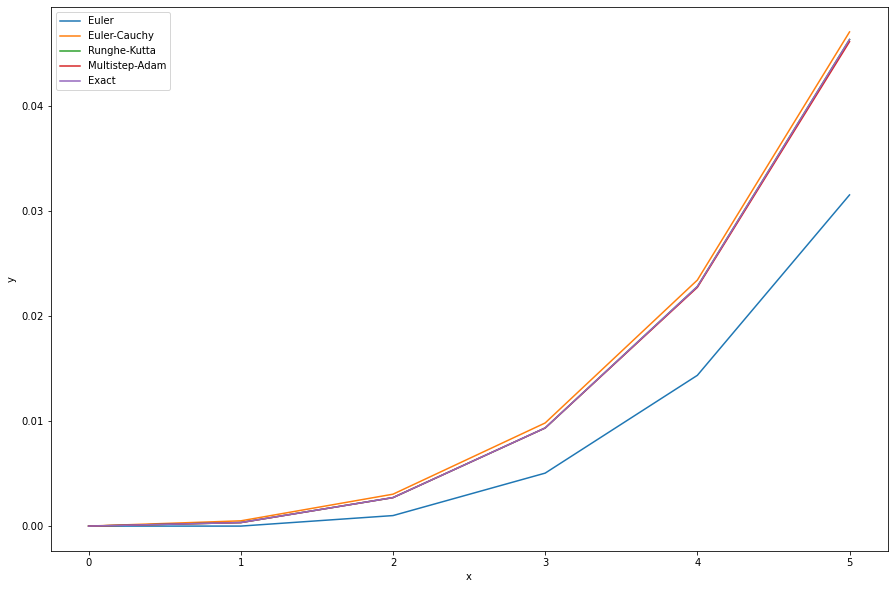

In [62]:
fig = plt.figure(figsize=(15, 10))
plt.plot(pd.DataFrame(euler(function, 0, 0, 0.1, 0.5, true_function))['y'], label="Euler")
plt.plot(pd.DataFrame(euler_cauchy(function, 0, 0, 0.1, 0.5, true_function))['y'], label="Euler-Cauchy")
plt.plot(pd.DataFrame(Runge_Kutta(function, 0, 0, 0.1, 0.5, true_function))['y'], label="Runghe-Kutta")
plt.plot(pd.DataFrame(multistep_Adams(function, 0, 0, 0.1, 1, true_function))['y'][0:6], label="Multistep-Adam")
plt.plot(true_function(pd.DataFrame(multistep_Adams(function, 0, 0, 0.1, 1, true_function))['x'][0:6]), label="Exact")
plt.legend()
# plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('graphs.jpg', bbox_inches='tight')
plt.show()